<div>
    <span>
    <p align="left">
    <img align="left" style="padding-right: 5px" valign="center" src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" width="28px">
    </p>
    </span>
    <span>
        <h1>Consumer Sales Lab</h1>
    </span>
</div>

<font color='red'><strong>Important!!</font></strong>: This lab is fairly challenging and may take longer than 60m to complete. Because of this, we've included a <a href='#shortcut'>shortcut cell</a> that _skips the EDA section_ of this lab and lets you get right to the analysis section. Work with your instructor and use your best judgement to use your time wisely to focus on the areas you'd like to practice.

This lab can be conducted in one of two ways:

- <a href="#eda">EDA</a> _and_ <a href="#analysis">Analysis</a>
- <a href="#analysis">Analysis</a> only

The <a href="#eda">EDA</a> section covers the following topics:

- <a href='#import'>Importing</a> data from csvs
- <a href="#nulls">Handling nulls</a>
- <a href='#dtypes'>Casting different Dtypes</a>
- <a href="#join">Complex joining</a> of star-schema tables

The <a href="#analysis">Analysis</a> section covers the following topics:

- <a href='#fe'>Feature engineering</a>
- <a href="#visualization">Visualization and Reporting</a>

<details>
    <summary>Table of Contents</summary>
    <ul>
        <li><a href="#eda">EDA</a></li>
        <ul>
            <li><a href='#import'>Import</a></li>
            <li><a href="#nulls">Nulls</a></li>
            <li><a href='#dtypes'>Dtypes</a></li>
            <li><a href="#join">Join</a></li>
        </ul>
        <li><a href="#analysis">Analysis</a></li>
        <ul>
            <li><a href='#fe'>Feature Engineering</a></li>
            <li><a href="#visualization">Visualization and Reporting</a></li>
            <ul>
                <li><a href='#1a'>1.A</a></li>
                <li><a href="#1b">1.B</a></li>
                <li><a href='#1c'>1.C</a></li>
                <li><a href="#2a">2.A</a></li>
                <li><a href="#3a">3.A</a></li>
            </ul>
        </ul>
    </ul>
</details>
<details>
    <summary>Background</summary>
    <ul>
        <li>Originally adapted from <a href="https://sense-demo.qlik.com/sense/app/372cbc85-f7fb-4db6-a620-9a5367845dce">qlik</a>, we'll be performing EDA on a consumer data set.</li>
    </ul>
</details>
<details id='prompts'>
    <summary>Prompts</summary>
    <br>
    Your boss, Joanna, has requested a report on the following:
    <ol>
        <li>Product Sales</li>
        <ol>
            <li>Gross margin analysis by product group.</li>
            <li>Sales by product group, top 10 product groups only.</li>
            <li>Sales, by year/month, year over year</li>
        </ol>
        <li>Sales Reps</li>
        <ol>
            <li>Sum of Sales and sales quantity, by rep, by customer</li>
        </ol>
        <li>Supply Chain</li>
        <ol>
            <li>Inventory vs Lead Time for all products</li>
        </ol>
    </ol>
</details>
<details id='dictionary'>
    <summary>Data Dictionary</summary>
    <br>
    <!-- table created with https://www.tablesgenerator.com/html_tables please see ../assets/dictionary.tgn file -->
    <table>
  <tr>
    <th>Table</th>
    <th>Field</th>
    <th>Description</th>
    <th>PK</th>
    <th>FK</th>
  </tr>
  <tr>
    <td>Item master.xls</td>
    <td>Item Number</td>
    <td>Foreign key to Sales.Item Number field. Unique identifier for item</td>
    <td>Y</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Item master.xls</td>
    <td>Product Group</td>
    <td>Group for the product, i.e. Frozen Foods, Deli, etc</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Item master.xls</td>
    <td>Product Line</td>
    <td>Product line, i.e. Food, Drink, etc</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Item master.xls</td>
    <td>Product Sub Group</td>
    <td>Detail field for the Product Group field, i.e. Produce -&gt; Fresh Vegetables</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Item master.xls</td>
    <td>Product Type</td>
    <td>Type of product and additional detail at the sub group level, i.e. 'Breakfast Foods'</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Manager</td>
    <td>Name of manager</td>
    <td>N</td>
    <td>N</td>
  </tr>  
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Manager Number</td>
    <td>ID of manager</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Path</td>
    <td>Order through which sales passes through reps, separated by hyphens. Correlates with Sales Rep ID key.</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Sales Rep Name</td>
    <td>Primary sales rep name</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Sales Rep Name 1</td>
    <td>Secondary sales rep name (nullable)</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Sales Rep Name 2</td>
    <td>Tertiary sales rep name (nullable)</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Sales Rep Name 3</td>
    <td>Quaterinary sales rep name (nullable)</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales&nbsp;&nbsp;rep.csv</td>
    <td>Sales Rep ID</td>
    <td>Foreign key to Sales. UID for path.</td>
    <td>N</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Customers.xlsx</td>
    <td>Customer</td>
    <td>Name of customer</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Customers.xlsx</td>
    <td>Customer Number</td>
    <td>Unique identifier for customer name, keys to Sales.Customer Number</td>
    <td>Y</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Customers.xlsx</td>
    <td>City Code</td>
    <td>City ID, foreign key for City.City Code</td>
    <td>N</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Cities.xlsx</td>
    <td>City</td>
    <td>Name of city</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Cities.xlsx</td>
    <td>City Code</td>
    <td>ID of city name</td>
    <td>Y</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Cities.xlsx</td>
    <td>Region</td>
    <td>Sales region (i.e. USA, Nordic, etc)</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Cities.xlsx</td>
    <td>Latitude</td>
    <td>Latitude of city</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
      <td>Cities.xlsx</td>
    <td>Longitude</td>
    <td>Longitude of city</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Cities.xlsx</td>
    <td>Desc</td>
    <td>String description of city, including city, state (if applicable), and country</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>%KEY</td>
    <td>Primary key of table</td>
    <td>Y</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Cost</td>
    <td>Total cost of sale for transaction [USD]</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Customer Number</td>
    <td>Customer number, keys to Customer.Customer Number</td>
    <td>N</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Date</td>
    <td>Date of sale</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>GrossSales</td>
    <td>Gross sale for invoice [USD]</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Invoice Date</td>
    <td>Date of invoice</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Item Desc</td>
    <td>Description of invoiced item</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Item Number</td>
    <td>ID of invoiced item (product) - not a primary key. Keys to Item.Item Number</td>
    <td>N</td>
    <td>Y</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Margin</td>
    <td>Percent gross margin of line item sale</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Order Number</td>
    <td>ID of the order placed</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Promised Delivery Date</td>
    <td>Agreed date of delivery</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Sales</td>
    <td>Gross sale for invoice [USD], less cost of sale</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Sales Qty</td>
    <td>Qty of invoiced item sold (see Item Number, Item Desc)</td>
    <td>N</td>
    <td>N</td>
  </tr>
  <tr>
    <td>Sales.xlsx</td>
    <td>Sales Rep Number</td>
    <td>Sales rep ID credited with sale</td>
    <td>N</td>
    <td>Y</td>
  </tr>
</table>
</details>

<div id='eda'></div>
<h2>EDA</h2>

Before we create our charts/reports for Joanna, we'll need to sanity check our input data. We'll get to the analysis (feature engineering) and visualization and reporting in just a bit.

<div id='import'></div>
<h3>Import Data</h3>
Read in the data. Check the raw file to make sure you understand quote characters, delimiters, and encoding. You will need to use the encoding flag here since we are dealing with international character sets.

In [1]:
# Conduct any library imports here
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in your sales, cities, customers, item_master, and sales_rep csvs here.
sales = pd.read_csv('../data/sales.csv')
cities = pd.read_csv('../data/cities.csv', encoding = "ISO-8859-1")
customers = pd.read_csv('../data/customers.csv', encoding = "ISO-8859-1")
item_master = pd.read_csv('../data/item_master.csv')
sales_rep = pd.read_csv('../data/sales_rep.csv')

In [3]:
sales.head(3)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180


<div id='nulls'></div>
<h3>Nulls</h3>
Check for nulls and missing values in all imported tables. If you are filling missing values, state your reasoning for dropping and/or imputing data.

In [4]:
# No nulls in Sales
print(f'Sales nulls: {sales.isnull().sum().sum()}')
print(f'Customer nulls: {customers.isnull().sum().sum()}')
print(f'Item Master nulls: {item_master.isnull().sum().sum()}')

Sales nulls: 0
Customer nulls: 0
Item Master nulls: 0


In [5]:
# Sales Rep looks like we just don't have a 2nd or 3rd sales rep for that territory/path.
sales_rep[ sales_rep['Sales Rep Name2'].isnull() | sales_rep['Sales Rep Name3'].isnull() ]

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121
5,Brenda Gibson,109,Brenda Gibson-Ken Roberts,Ken Roberts,Brenda Gibson,Ken Roberts,NaN,145
6,Brenda Gibson,109,Brenda Gibson-Robert Kim,Robert Kim,Brenda Gibson,Robert Kim,NaN,163
7,Brenda Gibson,109,Brenda Gibson-William Fisher,William Fisher,Brenda Gibson,William Fisher,NaN,185
21,John Greg,134,John Greg-David Laychak,David Laychak,John Greg,David Laychak,NaN,118
22,John Greg,134,John Greg-Kathy Clinton,Kathy Clinton,John Greg,Kathy Clinton,NaN,144


In [6]:
# Don't think we'll be using the Desc field, so we'll leave this as-is
cities[cities['Desc'].isnull()]

,City,City Code,Region,Latitude,Longitude,Desc
94,Yokohama,95,Japan,35.455592,139.572196,NaN


<div id='dtypes'></div>
<h3>Dtypes</h3>
Review all imported tables and convert the data types if necessary, according to the rules in the following table:
<br><br>
<table>
    <tr>
        <th>Name</th>
        <th>Dtype</th>
    </tr>
    <tr>
        <td>Primary or Foreign Keys</td>
        <td>int64 or int32</td>
    </tr>
    <tr>
        <td>Currency</td>
        <td>float64</td>
    </tr>
    <tr>
        <td>Text fields</td>
        <td>object (string)</td>
    </tr>
    <tr>
        <td>Discrete, non-negative values</td>
        <td>int64 or int32</td>
    </tr>
    <tr>
        <td>Dates</td>
        <td>datetime64[ns] (Timestamp object)</td>
    </tr>
</table>
    

In [7]:
# Dtypes look good as-is with the exception of the datetime fields in the sales df.
# This might take a minute to run since we have quite a few rows.
sales['Promised Delivery Date'] = pd.to_datetime(sales['Promised Delivery Date'])
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'])
sales['Promised Delivery Date'] = pd.to_datetime(sales['Promised Delivery Date'])
sales['Date'] = pd.to_datetime(sales['Date'])
# Let's get the qty as an int since we can't have fractional qtys
sales['Sales Qty'] = sales['Sales Qty'].astype('int64')

sales.dtypes

%KEY                               int64
Cost                             float64
Customer Number                    int64
Date                      datetime64[ns]
GrossSales                       float64
Invoice Date              datetime64[ns]
Invoice Number                     int64
Item Desc                         object
Item Number                        int64
Margin                           float64
Order Number                       int64
Promised Delivery Date    datetime64[ns]
Sales                            float64
Sales Qty                          int64
Sales Rep Number                   int64
dtype: object

<div id='join'></div>
<h3>Join</h3>
Join all your tables together and store the joined result into a dataframe named <code>cs</code>. You'll need this for the <a href="#visualization">reporting and visualization</a> section below. 

Use the <a href="#dictionary">data dictionary</a> for guidance.

In [8]:
cs = pd.merge(sales, item_master, how='left', left_on='Item Number', right_on='Item Number') \
    .merge(sales_rep, how='left', left_on='Sales Rep Number', right_on='Sales Rep ID') \
    .merge(customers, how='left', left_on='Customer Number', right_on='Customer Number') \
    .merge(cities, how='inner', left_on='City Code', right_on='City Code')

<div id='Analysis'></div>
<h2>Analysis</h2>

<div id='fe'></div>
<h3>Feature Engineering</h3>
<ul>
    <li>Create a new column, <code>GrossMargin</code>, which is the <code>GrossSales</code> minus the <code>Cost</code>, all divided by <code>GrossSales</code>. Store this value as a float (percentage).</li>
    <li>Create a new column, <code>ShipDiff</code>, which is the difference between the <code>Promised Delivery Date</code> and the <code>Invoice Date</code>, in <code>seconds</code>.</li>
    <li>Drop the <code>%KEY</code>, <code>Sales Rep Number</code>, <code>Manager Number</code>, <code>Path</code>, <code>Sales Rep ID</code>, and <code>Desc</code>.</li>
</ul>

In [9]:
cs['GrossMargin'] = (cs['GrossSales'] - cs['Cost']) / cs['GrossSales']

In [10]:
cs['ShipDiff'] = (cs['Promised Delivery Date'] - cs['Invoice Date']).dt.seconds

In [11]:
cs.drop(['%KEY', 'Sales Rep Number', 'Manager Number', 'Path', 'Sales Rep ID', 'Desc'], axis=1, inplace=True)

<div id='visualization'></div>
<h2>Reporting and Visualization</h2>
Create charts or reports according to the <a href="#prompts">prompts</a>.

<b>Use your best judgement to create visualizations or reports to best answer the questions. As yourself questions such as:</b>
<ul>
    <li>Is the data I'm using categorical or continuous?</li>
    <li>Am I looking at timeseries data?</li>
    <li>Am I representing a part-of-a-whole relationship?</li>
    <li>Do I have many data points? If so, could I report or chart a subset of that data?</li>
</ul>

<b>There's no right or wrong answer to these questions. As you solve them, focus on this progression:</b>
<ul>
    <li>First, create a pandas report with a dataframe or list of values that attempts to answer the prompt.</li>
    <li>If you get that done, try charting it out using a pandas charting method, like <code>.plot()</code></li>
    <li>If you get that done, look at how you might make your chart <i>more information dense</i></li>
        <ul>
            <li>Increase chart ink area</li>
            <li>Reduce visual clutter</li>
            <li>Use color to convey meaning</li>
            <li>Increase information density with shape, size, color</li>
            <li>Use callouts to highlight anomalies in your data or points of interest</li>
        </ul>
    <li>If you get that done, look at graduating from the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html">pandas plotting methods</a> to <a href="https://matplotlib.org/">matplotlib</a>, which is the backend for pandas plotting. This will allow you more control over your plots but the learning curve is fairly steep. Hang in there!</li>
</ul>


<img src="https://cdn.wikimg.net/en/strategywiki/images/7/70/SMB3-warpzone.png" height="150" width="150">

<div id='shortcut'></div>
<font color='red'><strong>Shortcut cell</font></strong>: if you'd like to bypass the EDA section, please run the cell below to import a pre-cleaned dataset into variable `cs` for charting purposes:

In [12]:
# Shortcut cell
cs = pd.read_csv('../data/pre_cleaned_data.csv', 
                 infer_datetime_format=True, 
                 parse_dates=['Date', 'Invoice Date', 'Promised Delivery Date']
                )

<div id='1a'></div>
<h3>1.A</h3>
Gross Margin by product group.

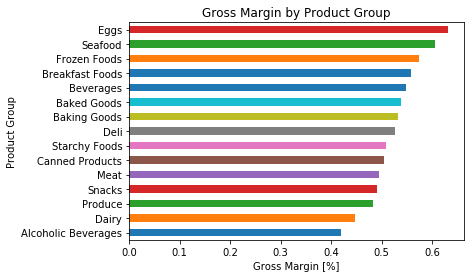

In [13]:
cs.groupby(['Product Group'])['GrossMargin'].mean().sort_values().plot(kind='barh')
plt.title('Gross Margin by Product Group')
plt.xlabel('Gross Margin [%]');

<div id='1b'></div>
<h3>1.B</h3>
Sales by product group, top 10 product groups only.

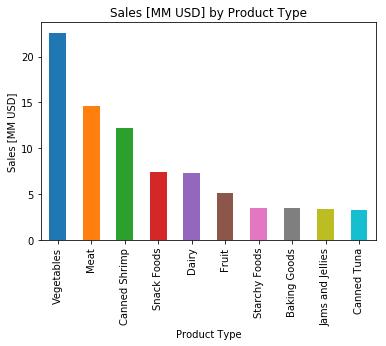

In [14]:
cs.groupby(['Product Type'])['GrossSales'].sum()\
    .apply(lambda x: x/1000000)\
    .sort_values(ascending=False)\
    .head(10)\
    .plot(kind='bar');
plt.title('Sales [MM USD] by Product Type')
plt.ylabel('Sales [MM USD]');

<div id='1c'></div>
<h3>1.C</h3>
Sales, by year/month, year over year

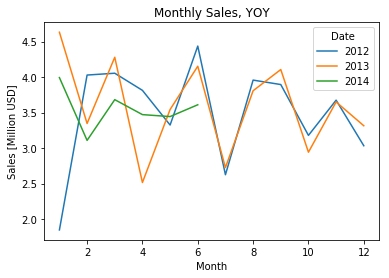

In [15]:
(cs.groupby([cs['Date'].dt.year, cs['Date'].dt.month])['GrossSales'].sum().unstack().T/1000000).plot()
plt.ylabel('Sales [Million USD]')
plt.xlabel('Month')
plt.title('Monthly Sales, YOY');

<div id='2a'></div>
<h3>2.A</h3>
Sum of Sales and sales quantity, by rep, by customer. Top 10 customer gross sales only. Formatted as a data frame, not a chart.

In [16]:
cs.groupby(['Sales Rep Name', 'Customer'])[['GrossSales', 'Sales Qty']].sum()\
    .sort_values('GrossSales', ascending=False)\
    .head(10)

GrossSales  Sales Qty
Sales Rep Name  Customer                                                   
Stewart Wind    PageWave                            5.867753e+06     232848
Judy Thurman    Paracel                             5.665680e+06      28360
                Deak-Perera Group.                  5.326473e+06      27784
Stewart Wind    Talarian                            4.442953e+06     177012
Lee Chin        Userland                            3.747440e+06     111200
                Target                              3.410170e+06     101601
Stewart Wind    Acer                                2.816532e+06     109296
Judy Thurman    Tandy Corporation                   2.551884e+06      11872
Lee Chin        Boston and Albany Railroad Company  2.075920e+06      61600
Cheryle Sincock Matradi                             1.730093e+06     100072

<div id='3a'></div>
<h3>3.A</h3>
Scatter plot of mean Gross Margin vs Gross Sales, by Product Sub Group

In [17]:
def gsgm(s):
    '''
    Scales gross sales and margin for plotting purposes
    '''
    if s.name == 'GrossSales':
        return(s)
    elif s.name == 'GrossMargin':
        return(s*100)

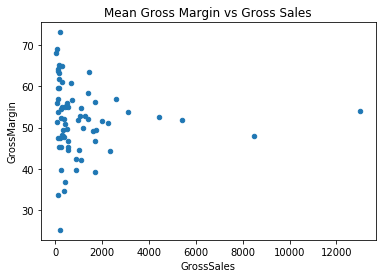

In [18]:
cs.groupby(['Product Sub Group'])[['GrossMargin', 'GrossSales']]\
    .mean()\
    .apply(lambda x: gsgm(x))\
    .plot\
    .scatter('GrossSales', 'GrossMargin');
plt.title('Mean Gross Margin vs Gross Sales');